<a href="https://colab.research.google.com/github/sudeshna999/Text-to-Image-Generator/blob/main/Image_Generator_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers transformers accelerate --upgrade
!pip install torch torchvision



In [2]:
from diffusers import StableDiffusionPipeline
import torch
import time
from PIL import Image
import matplotlib.pyplot as plt


In [6]:
prompt = "Cute Litle cat with her two little sister cat, 4K"


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

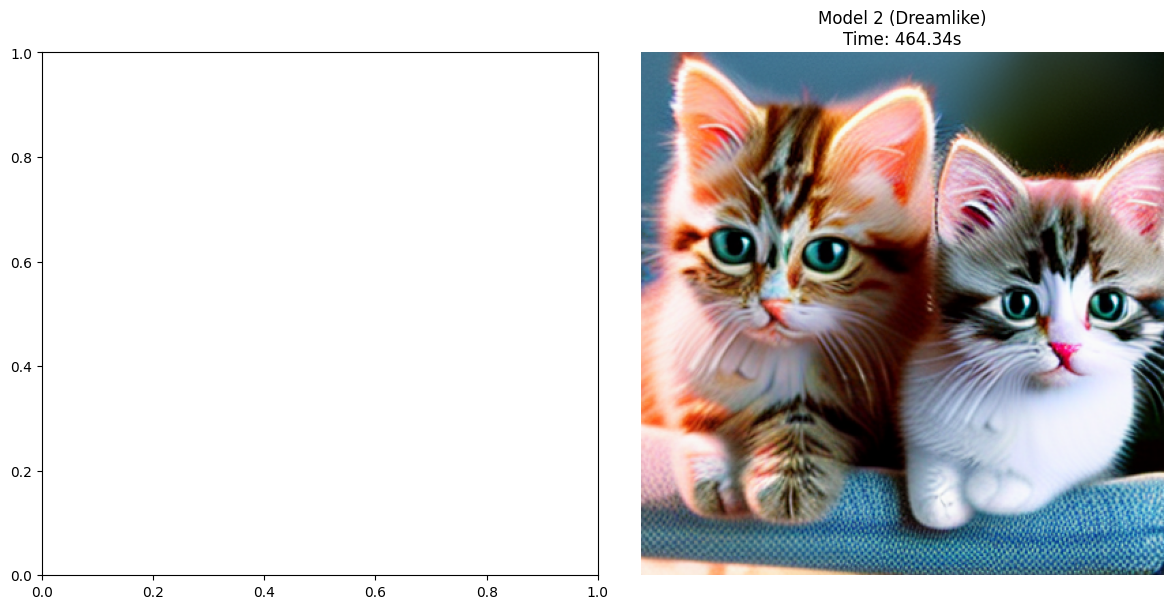

In [7]:
model_2 = StableDiffusionPipeline.from_pretrained(
    "dreamlike-art/dreamlike-photoreal-2.0",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
).to("cuda" if torch.cuda.is_available() else "cpu")


def generate_image(model, prompt):
    start = time.time()
    image = model(prompt, num_inference_steps=30,
                  height=384, width=384).images[0]
    end = time.time()
    return image, round(end - start, 2)

img2, time2 = generate_image(model_2, prompt)

fig, axs = plt.subplots(1, 2, figsize=(12,6))

axs[1].imshow(img2)
axs[1].set_title(f"Model 2 (Dreamlike)\nTime: {time2}s")
axs[1].axis("off")

plt.tight_layout()
plt.show()

